# Proyecto Final - ML Aplicado usando Python - Feb 2023
##### Por Eduard Vendrell Anguren

Imagina que trabajas en el departamento de marketing de una importante compañía de telefonía móvil. En los últimos meses habéis procedido a la obtención de numerosos datos relativos a diferentes modelos de teléfonos, estableciendo los precios de venta como variable principal a analizar. El planteamiento genérico del estudio que os proponéis realizar consiste en tratar de fijar un precio razonable, teniendo en cuenta el mercado, para los futuros modelos de móviles que vais a comercializar, en función de variables como el tamaño de memoria RAM, el de memoria interna, píxeles de resolución, etc.

En los siguientes apartados te iré planteando una serie de cuestiones encaminadas a desarrollar este estudio aplicando diversas técnicas de Machine Learning.


**1. El dataset que emplearemos en este caso, al tratarse de un ejercicio de naturaleza formativa, procede de kaggle. ¿Podrías indicar de qué tipo de plataforma estamos hablando?**


Se trata de una plataforma de acceso libre que dispone de numerosos recursos/datasets para profundizar en el conocimiento del Data Science en general y del Machine Learning en particular.

**2. El dataset al que hacemos referencia se denomina datos_moviles.csv y puedes descargarlo al final de la descripción de este proyecto. ¿Qué tipo de archivo es este? ¿Cómo se puede cargar esta tipología de ficheros mediante la biblioteca estándar de Python?**


Se trata de un archivo .csv (comma separated values) que contiene instancias (filas) y características (columnas) separadas por un delimitador.

La biblioteca standard de python incluye 'csv' para estos menesteres. 
Para poderlo cargar, hay que usar el siguiente código:

In [ ]:
import csv

with open('/home/code/ML_course/datos_moviles.csv') as f:
    lectura=csv.reader(f,delimiter=',')
    ''' 
    # mostramos características (encabezado de columnas)
    encabezados=next(lectura)
    
    # mostramos instancias (filas)
    print(*encabezados) 
    for fila in lectura:
        print(*fila)
    '''

**3. Carga el fichero datos_moviles.csv en Python, de modo que los datos se guarden en un DataFrame, y escribe el código necesario para visualizar las primeras filas del dataset y para saber cuántos registros, así como el número de características que tiene.**



In [3]:
# la ibreria pandas nos permite leer un archivo .csv y convertirlo directamente a un DataFrame:
import pandas as pd

df = pd.read_csv("/home/code/ML_course/datos_moviles.csv")

# visualizar las primeras filas del dataset 
print(df.head())

# visualizar número de registros y características
print(f"\nEl dataset 'datos_moviles' contiene {len(df)} registros y {len(df.columns)} caraterísticas")



   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1954     0            5         1   0       0          24      8   
1           1445     1            5         0   0       0          53      7   
2            509     1            6         1   2       1           9      1   
3           1866     0            5         0  13       1          52      7   
4            775     0           10         0   3       0          46      7   

   mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0        187        4  ...      1149   700    16     3          5        1   
1        174        7  ...       836  1099    17     1         20        1   
2         93        5  ...      1224   513    19    10         12        1   
3        185        1  ...       563   373    14     9          3        1   
4        159        2  ...      1864   568    17    15         11        1   

   touch_screen  wifi  price_range  price  
0     

**4. En primer lugar, nos centraremos en la variable etiqueta price_range o rango de precios.Esta variable toma el valor 0 para un coste bajo del móvil, 1 para coste medio, 2 para coste alto y 3 para coste muy alto (por ejemplo, un móvil de lujo). Determina las correlaciones existentes entre todas las variables, pero, en particular, céntrate en las relaciones con price_range. ¿Cuáles son las 5 variables que tienen mayor correlación con price_range?**


In [4]:
import numpy as np

# Matrix de Correlaciones de todo el dataset 
matriz_corr = np.corrcoef(df.values.T)   

# centrándonos en las correlaciones con 'price_range' (fila con índice 20 de la matriz),
# creamos un dict con key:value => 'caracteristica':'correlación con 'price_range'
corr_price_range = dict(zip(df.columns, matriz_corr[20]))

# ordenamos el dict por valor (correlación) de mayor a menor
corr_ordenada = sorted(corr_price_range.items(), key=lambda item: item[1], reverse=True)

# mostramos el dict ordenado (eliminando la correlación 'price_range : price_range')
print("Top 5 correlaciones con 'price_range':\n______________________________________")
for i in range(5):
    if corr_ordenada[i][0] != "price_range":
        print( "{:<14}:{:>8,.4f}".format( corr_ordenada[i][0],corr_ordenada[i][1] ))
        
        
        

Top 5 correlaciones con 'price_range':
______________________________________
ram           :  0.9170
price         :  0.8796
battery_power :  0.2007
px_width      :  0.1658


De los resultados podemos determinar que, como era de esperar, existe una fuerte correlación positiva entre 'price' y 'price_range' (0,8796). No obstante, sorprende ver que existe una correlación positiva aún mayor con la variable 'ram' (0,9170).
También observamos una baja correlación de 'price_range' para con el resto de variables.


**5. Dado que price (el precio en euros de cada móvil) es una variable continua, más interesante para nuestra investigación que range_price, procede a representar gráficamente la matriz de correlaciones considerando las dos variables más correlacionadas con price (excluyendo a price_range, que sirve para etiquetar los móviles en función de dicho precio): ram y battery_power. Recuerda incluir en la matriz a la propia variable price.**



Apicando el metodo anterior, comprobemos cuáles son las 2 variables más correlacionadas con la variable 'price', excluyendo 'price_range':

In [5]:
# centrándonos en las correlaciones con 'price' (fila con índice 21 de la matriz),
# creamos un dict con key:value => 'caracteristica':'correlación con 'price'
corr_price_range = dict(zip(df.columns, matriz_corr[21]))

# ordenamos el dict por valor (correlación) de mayor a menor
corr_ordenada = sorted(corr_price_range.items(), key=lambda item: item[1], reverse=True)

# mostramos el dict ordenado (eliminando la correlación 'price : price' y 'price_range : price')
print("Top 5 correlaciones con 'price':\n______________________________________")
for i in range(7):
    if corr_ordenada[i][0] != "price" and corr_ordenada[i][0] != "price_range":
        print( "{:<14}:{:>8,.4f}".format( corr_ordenada[i][0],corr_ordenada[i][1] ))
        

Top 5 correlaciones con 'price':
______________________________________
ram           :  0.8053
battery_power :  0.1892
px_width      :  0.1614
px_height     :  0.1389
int_memory    :  0.0601


Representemos ahora la matrix de correlaciones entre las variables 'ram', 'battery_powery' y 'price':

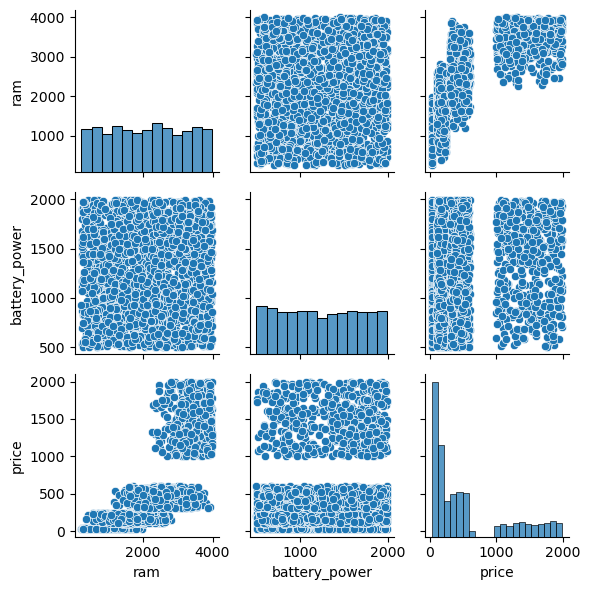

In [6]:
###################################################################
# Representa la Matrix de Correlaciones de ram, battery, price
###################################################################
import matplotlib.pyplot as plt
import seaborn as sns

# matrix de correlaciones 'pairplot' en la diagonal se obtiene la func. densidad de la variable que se trate
columnas = ['ram', 'battery_power', 'price']
sns.pairplot(df[columnas], height=2)
plt.tight_layout()    # ajustar los títulos de los ejes de una manera más precisa. 

Observamos que puede existir una cierta relación lineal entre las variables 'ram' y 'price' pero no podemos decir lo mismo entre las variables 'battery power' y 'price'.


**6. Procede a obtener la regresión lineal de la variable price frente a la variable ram. Genera la representación gráfica, determina los coeficientes de regresión y los de determinación. ¿Se alcanza un buen ajuste?**




Coeficientes de regresión:
	Coeficiente w1:     0.44
	Coeficiente w0:  -396.04

Ecuación de la recta de regresión: y = 0.44x-396.04

Valor del coeficiente de determinación (R^2) del conjunto de entrenamiento: 0.644

Valor del coeficiente de determinación (R^2) del conjunto de prueba: 0.663

Error cuadrático medio: 118162.34


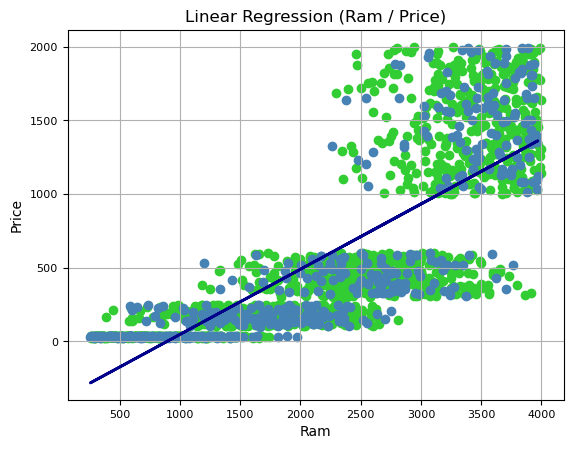

In [7]:
#import Scikit-learn module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# creamos lista de valores de entrada 'X' con la variable independiente 'ram'
X = [df['ram'].values]
X = np.transpose(X)


# creamos lista de etiquetas (labels) o valores de salida 'y' con la variable dependiente 'price'
y = df['price'].values


# Creamos el conjunto de datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=20)

# Ajustamos/entrenamos el modelo según el planteamiento de mínimos cuadrados (OLS). El ajuste se realiza sobre los datos de entrenamiento
lr=LinearRegression().fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Valores de los coeficientes de regresión
print("\nCoeficientes de regresión:")
print("\tCoeficiente w1: {:>8,.2f}".format(*lr.coef_))
print("\tCoeficiente w0: {:>8,.2f}".format(lr.intercept_))
print("\nEcuación de la recta de regresión: y = {:.2f}x{:+.2f}".format(*lr.coef_, lr.intercept_))

# Valor del coeficiente de determinación (weight=3) de ambos conjuntos (train & test)
print("\nValor del coeficiente de determinación (R^2) del conjunto de entrenamiento:",round(lr.score(X_train,y_train),3))
print("\nValor del coeficiente de determinación (R^2) del conjunto de prueba:", round(lr.score(X_test,y_test),3))

# Valor del error cuadrático medio
# Cuanto más pequeño mejor será la predicción
print("\nError cuadrático medio: {:.2f}".format(mean_squared_error(y_test, y_pred)))

#Salidas gráficas

#Representación de los puntos del conjunto de entrenamiento
plt.scatter(X_train,y_train,color='limegreen', marker='o')
#Representación de los puntos del conjunto de prueba
plt.scatter(X_test, y_test,  color='steelblue', marker='o')

#Representación de la recta de regresión
plt.plot(X_test, y_pred, color='darkblue', linewidth=2)
plt.xlabel('ram'.capitalize())
plt.ylabel('price'.capitalize())
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Linear Regression ({} / {})'.format('ram'.capitalize(), 'price'.capitalize()))
plt.grid()
plt.show()

R^2 se  emplea para cuantificar cómo de cerca se encuentran los puntos de la recta de regresión.
Representa el porcentaje de variación de la variable dependiente ('price') respecto a la media.
Por lo general, cuando más elevado sea R^2  (0%-100%), mayor será la bondad del ajuste de los datos al modelo. En nuestro caso, nos movemos entorno al 64%.

Además, ambos coeficientes de determinación (train & test) deberían ser parecidos para evitar riesgos de sobre-ajustes o infra-ajustes, y vemos que así es.

Respecto al error cuadrático, cuanto menor sea mayor será la bondad del ajuste pero observamos un error cuadrático muy significativo por lo que la capacidad de predicción del modelo de Regresión Lineal es muy pobre.


**7. Si quisieras fijar el precio de un móvil con 3100 MB de memoria RAM, considerando el anterior ajuste lineal, ¿qué valor establecerías?**



In [9]:
mem_ram = [[3100]]

# usando el modelo ajustado anteriormente, predecimos el precio considerando el tamaño de RAM en la variable 'mem_ram'
precio = lr.predict(mem_ram)
print("\nTeniendo en cuenta una memoria RAM de {}kB, el precio de venta sería de {} €.\n".format(*mem_ram[0], round(*precio)))


Teniendo en cuenta una memoria RAM de 3100kB, el precio de venta sería de 976 €.



**8. Representa gráficamente los residuos obtenidos frente a los valores predichos según el modelo de regresión lineal generado (ten en cuenta que los precios de los móviles oscilan aproximadamente entre 20 y 2000 €).**



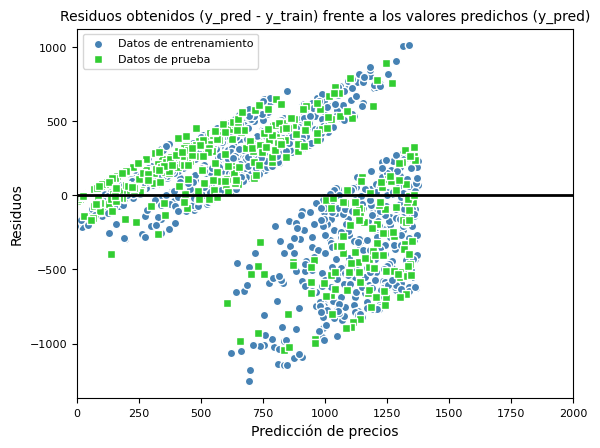

In [10]:
# residuos obtenidos frente a los valores predichos

y_train_pred=lr.predict(X_train)

plt.scatter(y_train_pred, y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white', label='Datos de entrenamiento')
plt.scatter(y_pred, y_pred-y_test,c='limegreen',marker='s',edgecolor='white', label='Datos de prueba')
plt.title("Residuos obtenidos (y_pred - y_train) frente a los valores predichos (y_pred)", fontsize=10) 
plt.xlabel("Predicción de precios") 
plt.ylabel("Residuos") 
plt.xticks(fontsize= 8)
plt.yticks(fontsize= 8)
plt.legend(loc='upper left',fontsize= 8)                # posicion de la leyenda en el gráfico
plt.hlines(y=0,xmin=0,xmax=2000,color='black',lw=2)     # linea negra resaltada en el centro del gráfico
plt.xlim([0,2000])                                      # sirve para centrar la gráfica, de modo que los datos se representan desde x = -10 hasta x = 50.
plt.show()
  

Podemos observar de la gráfica que los residuos obtenidos frente a los valores predichos son considerables (la nube de puntos está alejada de la recta del centro para la mayoría de instancias, tanto de entrenamiento como de prueba) por lo que el modelo no parece una buena opción.


**9. Céntrate a continuación en las variables ram y battery_power, considerando price_range como una etiqueta de clasificación. Genera una clasificación del conjunto mediante un kernel lineal, incorporando, si puedes, la función plot_decisions_regions para mejorar la salida gráfica. Determina también la exactitud del test. Nota: carga los datos de price_range mediante la instrucción price_range=np.array(data['price_range']), a fin de que no tengas problemas con la dimensión de los arrays (recuerda transponerlo seguidamente).**


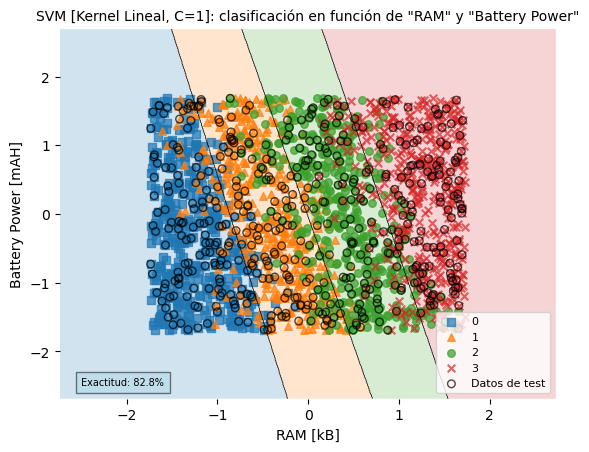

In [255]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
#from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# creamos lista de valores de entrada 'X' con las variables independientes 'ram' y 'battery_power'
columnas = ['ram', 'battery_power']
X = df[columnas].values


# creamos lista de etiquetas (labels) o valores de salida 'y' con la variable dependiente 'price_range'
y = df['price_range'].values


#Creamos el conjunto de datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=20)


#Realizamos el pre-escalado de características
sc=StandardScaler()
sc.fit(X_train)

# Aplicamos una transformación para que los datos mantengan la misma media y la misma desviación estándar;
# guardamos los datos transformados en variables con la extensión _std
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

#Aplicamos el algoritmo SVM 'Kernel Lineal' sobre los datos normalizados
clf=SVC(kernel="linear",random_state=1,C=1)
#clf=LinearSVC(C=1, random_state=1)   #<--- esta función es mucho más rápida pero obtenemos una exactitud menor (76%) ¿Por qué?
clf.fit(X_train_std,y_train)

#Creamos arrays bidimensionales con los datos del entrenamiento y del test
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))


#Atributos de mejora de la salida gráfica
scatter_kwargs = {'s': 30, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}                                                     # trasnparencia del color de las regiones
scatter_highlight_kwargs = {'s': 30, 'label': 'Datos de test', 'alpha': 0.7}

#Representamos el resultado con plot_decision_regions
plot_decision_regions(X_combined_std,y_combined,clf,legend=2,X_highlight=X_test_std,scatter_kwargs=scatter_kwargs, 
                      contourf_kwargs=contourf_kwargs,scatter_highlight_kwargs=scatter_highlight_kwargs)
#plot_decision_regions(X_combined_std,y_combined,clf,legend=2,X_highlight=X_test_std)
plt.legend(fontsize= 8) 
plt.xlabel('RAM [kB]')
plt.ylabel('Battery Power [mAH]')
plt.title('SVM [Kernel Lineal, C=1]: clasificación en función de "RAM" y "Battery Power"', fontsize=10)

#Analizamos finalmente la exactitud del modelo sobre los datos de prueba
predicciones = clf.predict(X_test_std)
accuracy = accuracy_score(y_true = y_test, y_pred = predicciones, normalize = True)

#Adding text inside a rectangular box by using the keyword 'bbox'
plt.text(-2.5, -2.5, 'Exactitud: '+str(round(100*accuracy,3))+"%", fontsize = 7, bbox = dict(facecolor = 'lightblue', alpha = 0.5))
plt.show()

De la gráfica anterior y de la exactitud obtenida (82,8%) podemos determinar que la aplicación del algoritmo Kernel Lineal para la clasificación resulta bastante apropiado para este dataset.


**10. ¿Qué resultado obtendrías si aplicas una clasificación, en el caso anterior, de base radial gaussiana con gamma = 20?**



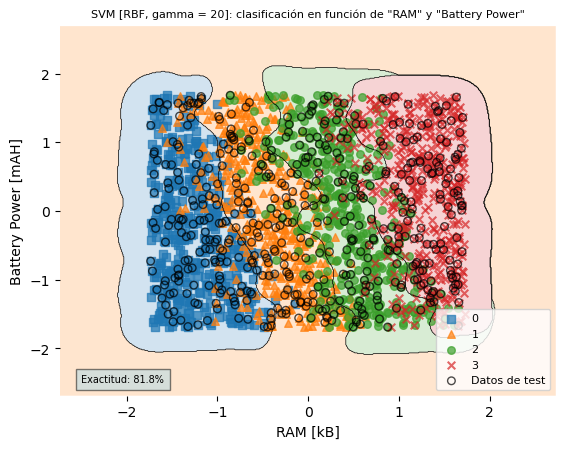

In [257]:

#Aplicamos el algoritmo RBF sobre los datos normalizados
clf=SVC(kernel="rbf",random_state=1,gamma=20 ,C=1)
clf.fit(X_train_std,y_train)

#Creamos arrays bidimensionales con los datos del entrenamiento y del test
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))


#Atributos de mejora de la salida gráfica
scatter_kwargs = {'s': 30, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}                           # transparencia del color de las regiones
scatter_highlight_kwargs = {'s': 30, 'label': 'Datos de test', 'alpha': 0.7}

#Representamos el resultado con plot_decision_regions
plot_decision_regions(X_combined_std,y_combined,clf,legend=2,X_highlight=X_test_std,scatter_kwargs=scatter_kwargs, 
                      contourf_kwargs=contourf_kwargs,scatter_highlight_kwargs=scatter_highlight_kwargs)

plt.legend(fontsize= 8) 
plt.xlabel('RAM [kB]')
plt.ylabel('Battery Power [mAH]')
plt.title('SVM [RBF, gamma = 20]: clasificación en función de "RAM" y "Battery Power"',fontsize=8)

#Analizamos finalmente la exactitud del modelo sobre los datos de prueba
predicciones = clf.predict(X_test_std)
accuracy = accuracy_score(y_true = y_test, y_pred = predicciones, normalize = True)

#Adding text inside a rectangular box by using the keyword 'bbox'
plt.text(-2.5, -2.5, 'Exactitud: '+str(round(100*accuracy,3))+"%", fontsize = 7, bbox = dict(facecolor = 'lightblue', alpha = 0.5))
plt.show()


Aplicando un algoritmo de calsificacion RBF con Gamma=20 y C=1, empeoramos ligeramente la exactitud con respecto al kernel lineal (81.8% vs 82.8%) por lo es más apropiado para este dataset utilizar el Kernel Lineal.


**11. Aplica una estrategia OvR (One vs Rest) para realizar la clasificación de los datos (el Foro de trabajo 2 te proporcionará pautas para ello) y determina de nuevo la exactitud del algoritmo.**



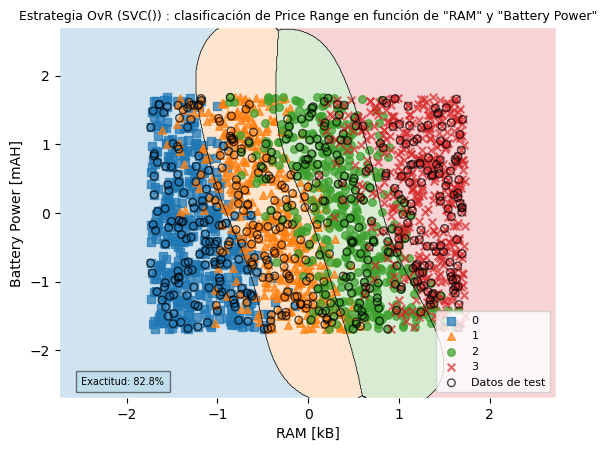

In [258]:
from sklearn.multiclass import OneVsRestClassifier

#Aplicamos estrategia OvR sobre SVN y sobre los datos normalizados
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train_std,y_train)


#Creamos arrays bidimensionales con los datos del entrenamiento y del test
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))


#Atributos de mejora de la salida gráfica
scatter_kwargs = {'s': 30, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}            # transparencia del color de las regiones
scatter_highlight_kwargs = {'s': 30, 'label': 'Datos de test', 'alpha': 0.7}

#Representamos el resultado con plot_decision_regions
plot_decision_regions(X_combined_std,y_combined,ovr_clf,legend=2,X_highlight=X_test_std,scatter_kwargs=scatter_kwargs, 
                      contourf_kwargs=contourf_kwargs,scatter_highlight_kwargs=scatter_highlight_kwargs)

plt.legend(fontsize= 8) 
plt.xlabel('RAM [kB]')
plt.ylabel('Battery Power [mAH]')
plt.title('Estrategia OvR (SVC()) : clasificación de Price Range en función de "RAM" y "Battery Power"', fontsize=9)

#Analizamos finalmente la exactitud del modelo sobre los datos de prueba
predicciones = ovr_clf.predict(X_test_std)
accuracy = accuracy_score(y_true = y_test, y_pred = predicciones, normalize = True)

#Adding text inside a rectangular box by using the keyword 'bbox'
plt.text(-2.5, -2.5, "Exactitud: "+str(round(100*accuracy,3))+"%", fontsize = 7, bbox = dict(facecolor = 'lightblue', alpha = 0.5))
plt.show()

Aplicando una estrategia OvR sobre SVC(), la exactitud que logramos en la clasificación es del 82,8%, idéntico resultado al obtenido mediante la aplicación del kernel lineal pese a que la función SVC(), por defecto, utiliza el algoritmo 'RBF'con gamma=1/n_features=0.5 y C=1.


**12. Supón ahora que no dispones del etiquetado de datos (es decir, de la variable price_range). Considerando las variables ram y price trata de obtener los posibles agrupamientos del conjunto de todos los datos mediante el algoritmo de k-medias. ¿Qué número de clústeres deberías plantear? Obtén la solución para un número de clústeres superior en una unidad. Compara los dos resultados observando las correspondientes gráficas.**



Para tener una idea del número de clústeres a plantear con el algoritmo K-Medias, analicemos la inercia y el índice de silueta para un rango de 'k' entre 1 y 8:


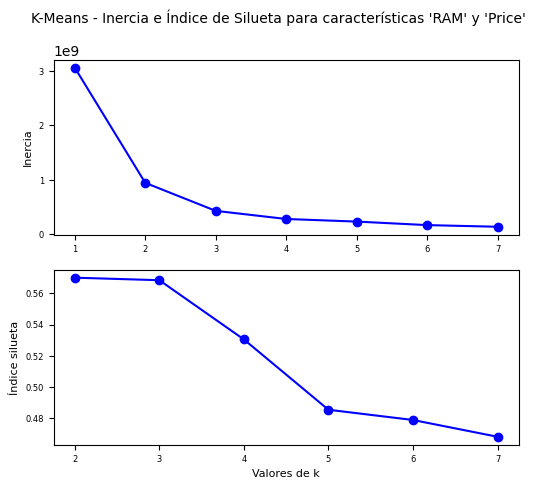

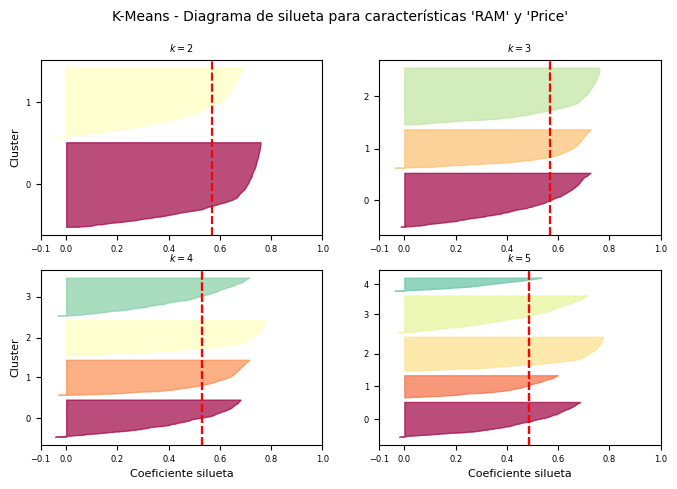

In [205]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.cm import Spectral

#Creamos las clases KMeans para cada agrupación y las instanciamos
kmeans_por_k = [KMeans(n_clusters=k, random_state=20, n_init='auto').fit(X) for k in range(1, 8)]

#Calculamos las inercias y los índices silueta
inertias = [model.inertia_ for model in kmeans_por_k]
siluetas = [silhouette_score(X, model.labels_) for model in kmeans_por_k[1:]]

plt.figure(figsize=(6,5))
#Dibujamos la gráfica de inercias
plt.subplot(2,1,1)
plt.plot(range(1, 8), inertias, "bo-")
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.ylabel("Inercia", fontsize=8)

#Dibujamos la gráfica de índices silueta
plt.subplot(2,1,2)
plt.plot(range(2, 8), siluetas, "bo-")
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel("Valores de k", fontsize=8)
plt.ylabel("Índice silueta", fontsize=8)
plt.suptitle("K-Means - Inercia e Índice de Silueta para características 'RAM' y 'Price'", fontsize=10)
plt.show

#Representación gráfica del coeficiente de silueta
plt.figure(figsize=(8, 5))
for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k-1)
    y_pred = kmeans_por_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if k in (2, 4):
            plt.ylabel("Cluster", fontsize=8)
        if k in (4, 5):
            
            plt.xlabel("Coeficiente silueta", fontsize=8)
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
        plt.axvline(x=siluetas[k - 2], color="red", linestyle="--")
        plt.title("$k={}$".format(k), fontsize=7)
plt.suptitle("K-Means - Diagrama de silueta para características 'RAM' y 'Price'", fontsize=10)
plt.show()


El número de agrupaciones más interesante a priori es el correspondiente a k =2, dado que es el punto de inflexión de la gráfica de la inercia y el que confiere mayor índice de silueta. 

Sin embargo, tras analizar el diagrama de siluetas, las dos mejores opciones por cuestión de homogeneidad me parecen las de k=3 y k=4 y si nos fijamos en el mejor comportamiento respecto a la línea discontinua, escogería k=4.

Por tanto, en base a lo comentado y conociendo que en el dataset original contaba con 4 rangos de precio, propongo plantear inicialmente k=4 clústeres y, posteriormente, compararlo con k+1=5 clústeres:


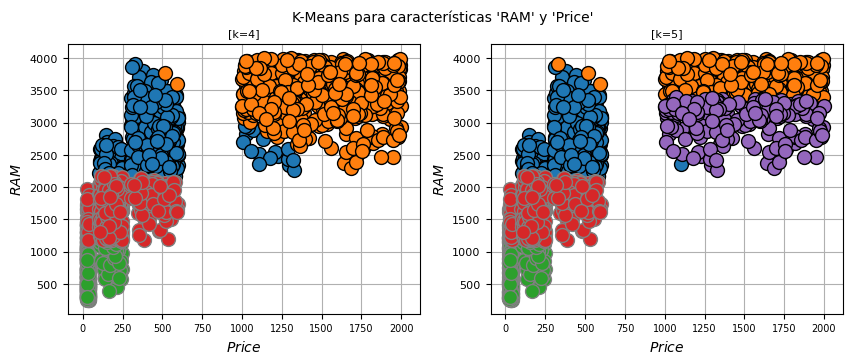

In [212]:
from mglearn.tools import discrete_scatter

# Generamos el conjunto de datos
# creamos lista de valores de entrada 'X' con las variables independientes 'ram' y 'price'
columnas = ['price', 'ram']
X = df[columnas].values
   
#Creamos la clase KMeans y la instanciamos para los distintos valores de k
k_values = [4,5]
i=1

plt.figure(figsize=(10,3.5))
for k_value in k_values:
    kmeans=KMeans(n_clusters= k_value, random_state=20, n_init='auto')
    kmeans.fit(X)
      
    plt.subplot(1,2,i)
    plt.title("[k={}]".format(k_value), fontsize=8)
    plt.xlabel("$Price$", fontsize=10, rotation=0)
    plt.ylabel("$RAM$", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    #set x-axis ticks
    plt.xticks(np.arange(0, 2250, 250), fontsize=7)
    plt.grid()
    discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers="o")
    i+=1   

plt.suptitle("K-Means para características 'RAM' y 'Price'", fontsize=10)
plt.show()


Recordemos que nuestro objetivo es agrupar cada instancia en rangos de precios.

Sin embargo, analizando las agrupaciones resultantes de utilizar K-Medias con k=4 observamos que

(a) para un mismo rango de precio escogido al azar, el algoritmo genera distintas agrupaciones lo cual no tiene sentido (Por ejemplo entre 125-250 € tenemos 3 agrupaciones) y

(b) las agrupaciones resultantes parecen no coincidir en forma con las agrupaciones que, a simple vista, parecen estar distribuidas verticalmente en columnas (estas últimas se corresponderían con rangos de precios bien delimitados).

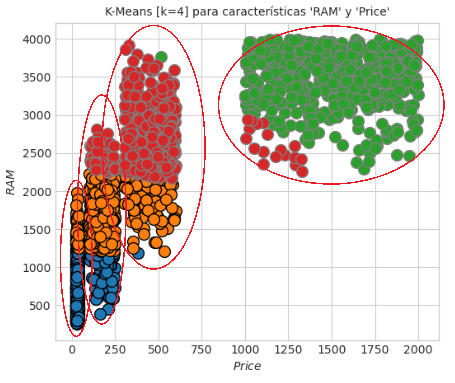


Por otro lado, vemos que incrementando el número de arupaciones (k=5), el resultado no mejora ya que en algunos casos genera una agrupación más para un mismo rango de precios (Por ejemplo entre 1,500-1,750 € tenemos ahora 2 agrupaciones en lugar de 1).

Estos resultados evidencían la incapacidad del algortimo K-Medias de manejar datasets con este tipo de distribución, datasets donde se presentan datos con cierta direccionalidad o más concretamente, formas no esféricas y complejas.


**13. Obtén ahora los agrupamientos mediante el método DBSCAN y, si te resulta posible, con el método HDBSCAN. Recuerda que en el Foro de trabajo 3 ya has tratado sobre ambos métodos. Para el método DBSCAN investiga un posible valor de épsilon que proporcione un agrupamiento que te resulte razonable y para HDBSCAN emplea el recomendado por las personas que lo han desarrollado.**



Como hemos visto en el ejercicio anterior, uno de los problemas que afecta al algoritmo de K-means es que no se encuentra preparado para trabajar con valores atípicos, como los que aparecen cuando las formas son arbitrarias o muy complejas.

El algoritmo DBSCAN solventa esta problemática porque es capaz de localizar regiones de alta densidad, separadas entre sí por regiones de baja densidad (la densidad está asociada a la mayor o menor cercanía de elementos en una ubicación, por lo que la puedes identificar con el número de instancias ('min_samples') que hay dentro de una región circundante, con un radio 'epsilon' especificado).

Aplicaremos a continuación dicho algoritmo para distintos valores de 'epsilon' y de 'min_samples':

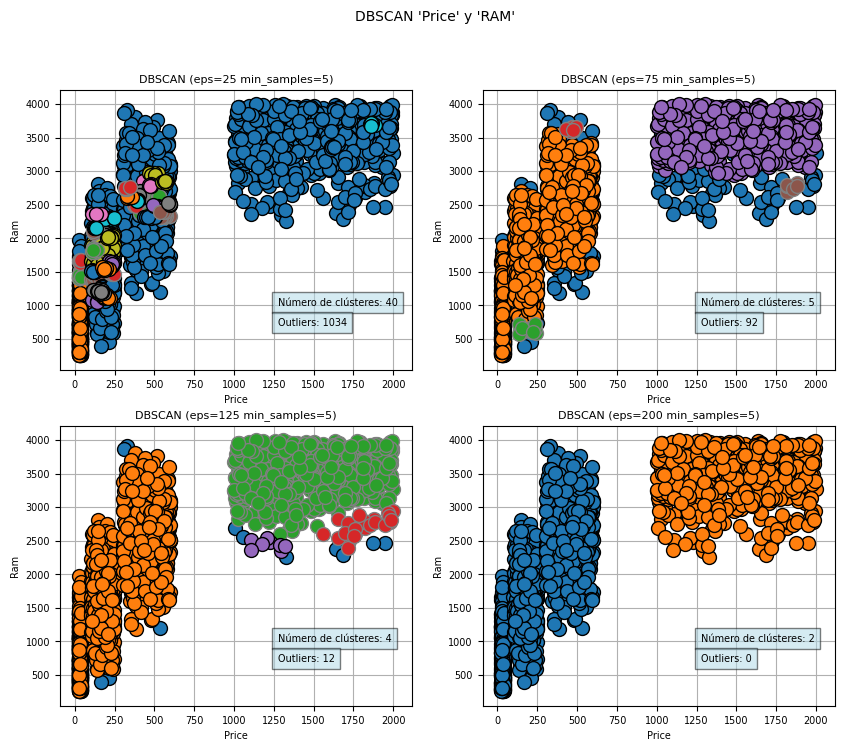

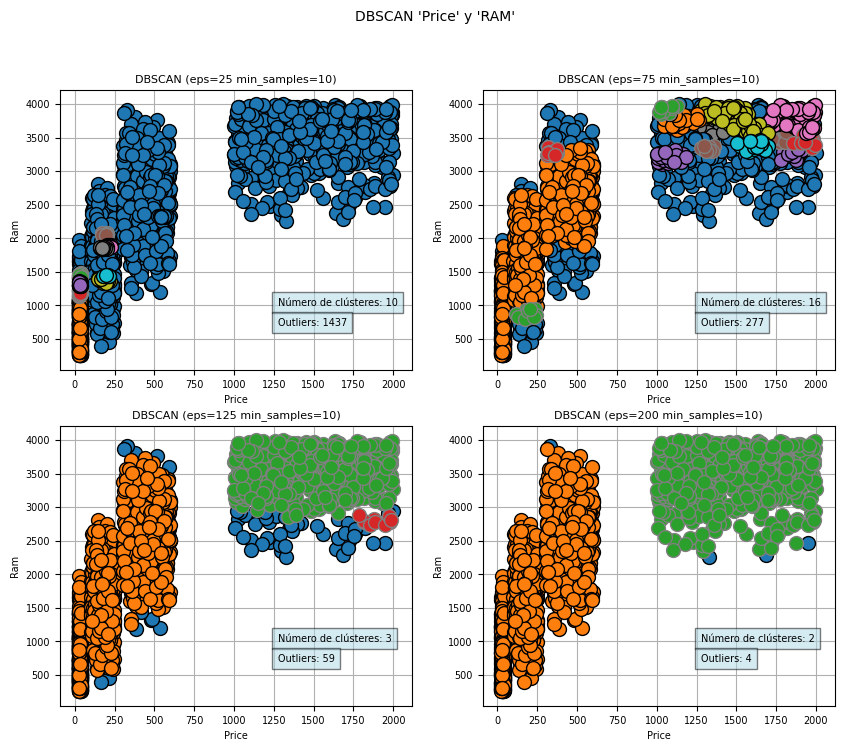

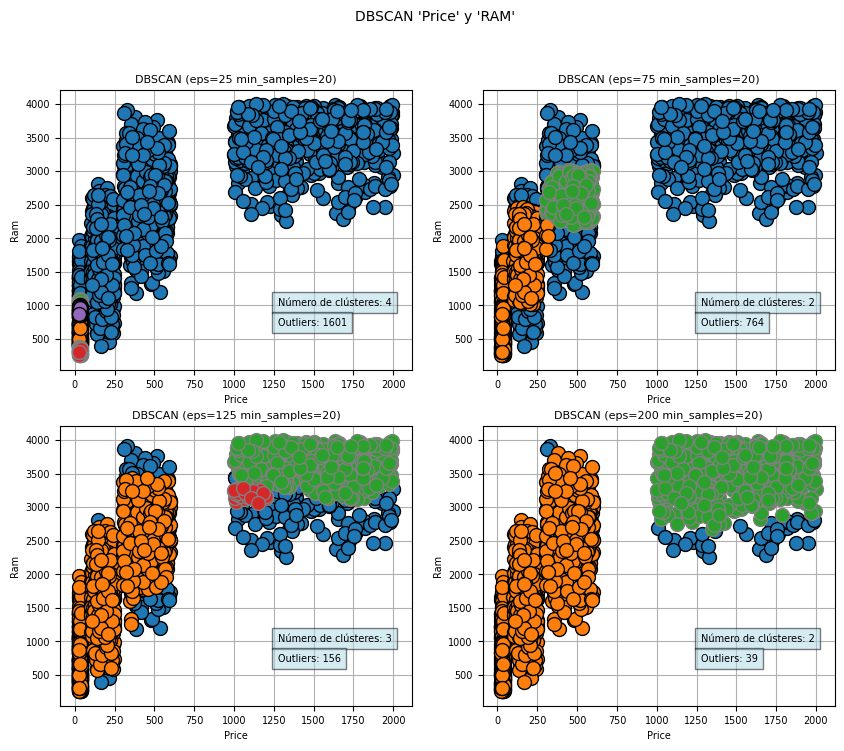

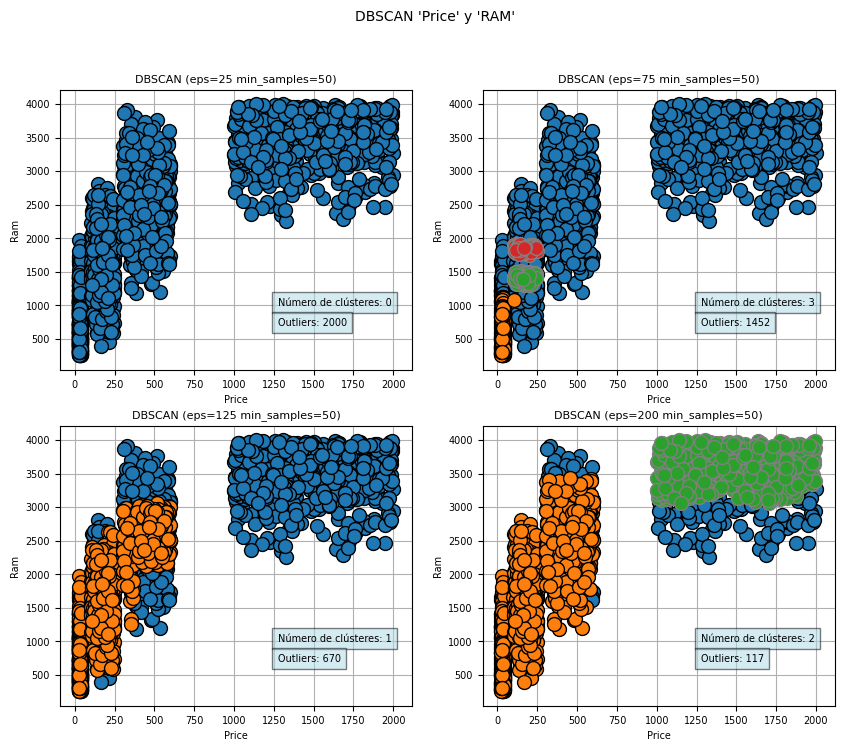

In [214]:
from sklearn.cluster import DBSCAN
from mglearn.tools import discrete_scatter

# Generamos el conjunto de datos
# creamos lista de valores de entrada 'X' con las variables independientes 'ram' y 'price'
columnas = ['price', 'ram']
X = df[columnas].values

eps_values = [25, 75, 125, 200]
min_samples = [5, 10, 20, 50]

for ms in min_samples:
    plt.figure(figsize=(10,8))
    i=1
    for eps_value in eps_values:
        #######################################################################
        #Creamos la clase DBSCAN y la instanciamos para cada eps y min_samples
        #######################################################################
        dbscan=DBSCAN(eps=eps_value,min_samples=ms)
        dbscan.fit(X)

        plt.subplot(2,2,i)
        discrete_scatter(X[:,0],X[:,1], dbscan.labels_,markers="o")
        plt.xlabel('price'.capitalize(), fontsize=7)
        plt.ylabel('ram'.capitalize(), fontsize=7)
        plt.xticks(np.arange(0, 2250, 250), fontsize=7)
        plt.yticks(fontsize=7)
        #Adding text inside a rectangular box by using the keyword 'bbox'
        plt.text(1275, 1000, 'Número de clústeres: '+str(dbscan.labels_.max()+1), fontsize = 7, bbox = dict(facecolor = 'lightblue', alpha = 0.5))
        plt.text(1275, 700, 'Outliers: '+ str(list(dbscan.labels_).count(-1)), fontsize = 7, bbox = dict(facecolor = 'lightblue', alpha = 0.5))

        plt.grid()
        plt.title('DBSCAN (eps={} min_samples={})'.format(eps_value, ms), fontsize=8)
        i+=1
    plt.suptitle("DBSCAN 'Price' y 'RAM'", fontsize=10)
    plt.show()



Observamos que con DBSCAN obtenemos el mejor compromiso de 'clústeres'-'Outliers' para:
- 'epsilon'=125, 'min_samples' =  5 --> 4 clústeres, 12 outliers
- 'epsilon'=200, 'min_samples' = 10 --> 2 clústeres,  4 outliers

Veamos ahora como se comporta el algoritmo HDBSCAN:


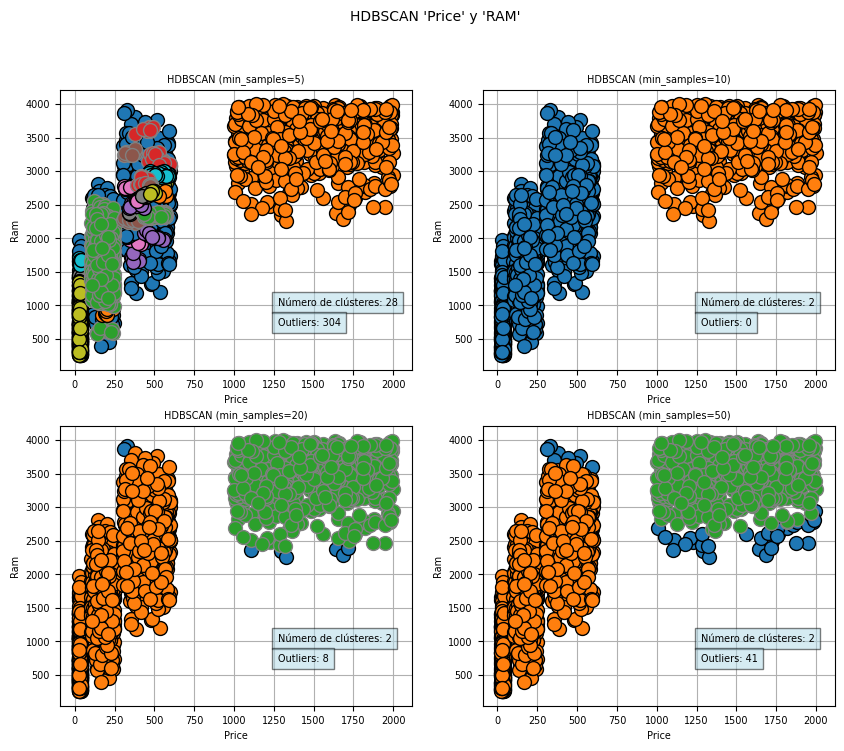

In [215]:

#######################################################################
#Creamos la clase HDBSCAN y la instanciamos para cada valor de min_sample
#######################################################################

import hdbscan

min_samples = [5, 10, 20, 50]

plt.figure(figsize=(10,8))
i=1
for ms in min_samples:

    #hdbscan_clf = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,gen_min_span_tree=False, 
    #                            leaf_size=40, metric='euclidean', min_cluster_size=5, 
    #                            min_samples=None, p=None)
    hdbscan_clf = hdbscan.HDBSCAN( min_samples=ms)
    hdbscan_clf = hdbscan_clf.fit(X)

    plt.subplot(2,2,i)
    discrete_scatter(X[:,0],X[:,1], hdbscan_clf.labels_,markers="o")
    plt.xlabel('price'.capitalize(), fontsize=7)
    plt.ylabel('ram'.capitalize(), fontsize=7)
    plt.xticks(np.arange(0, 2250, 250), fontsize=7)
    plt.grid()
    plt.yticks(fontsize=7)
    #Adding text inside a rectangular box by using the keyword 'bbox'
    plt.text(1275, 1000, 'Número de clústeres: '+str(hdbscan_clf.labels_.max()+1), fontsize = 7, bbox = dict(facecolor = 'lightblue', alpha = 0.5))
    plt.text(1275, 700, 'Outliers: '+ str(list(hdbscan_clf.labels_).count(-1)), fontsize = 7, bbox = dict(facecolor = 'lightblue', alpha = 0.5))
    plt.title('HDBSCAN (min_samples={})'.format(ms), fontsize=7)
    i+=1
plt.suptitle("HDBSCAN 'Price' y 'RAM'", fontsize=10)
plt.show()



Observamos que con HDBSCAN obtenemos el mejor compromiso de 'clústeres'-'Outliers' para:

'min_samples' = 10 --> 2 clústeres, 0 outliers

Por tanto, HDBSCAN es capaza de agrupar todas las instancias pese a la compleja distribución del dataset.

No obstante, parece que no es capaz de discernir entre agrupaciones de alta densidad muy cercanas la una de la otra como a simple vista seríamos capaces de hacer y según ilustran los círculos de la siguiente figura:
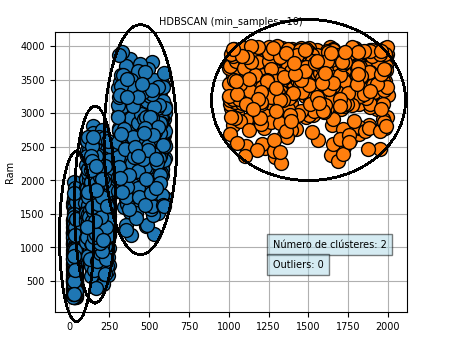



**14. Aplica el algoritmo de agrupamiento por aglomeración al conjunto de datos, considerando el número que consideres más adecuado de clústeres.**



Para hacernos una idea del número de agrupmaientos adecuado, representaremos en primer lugar el dendrograma correspondiente:


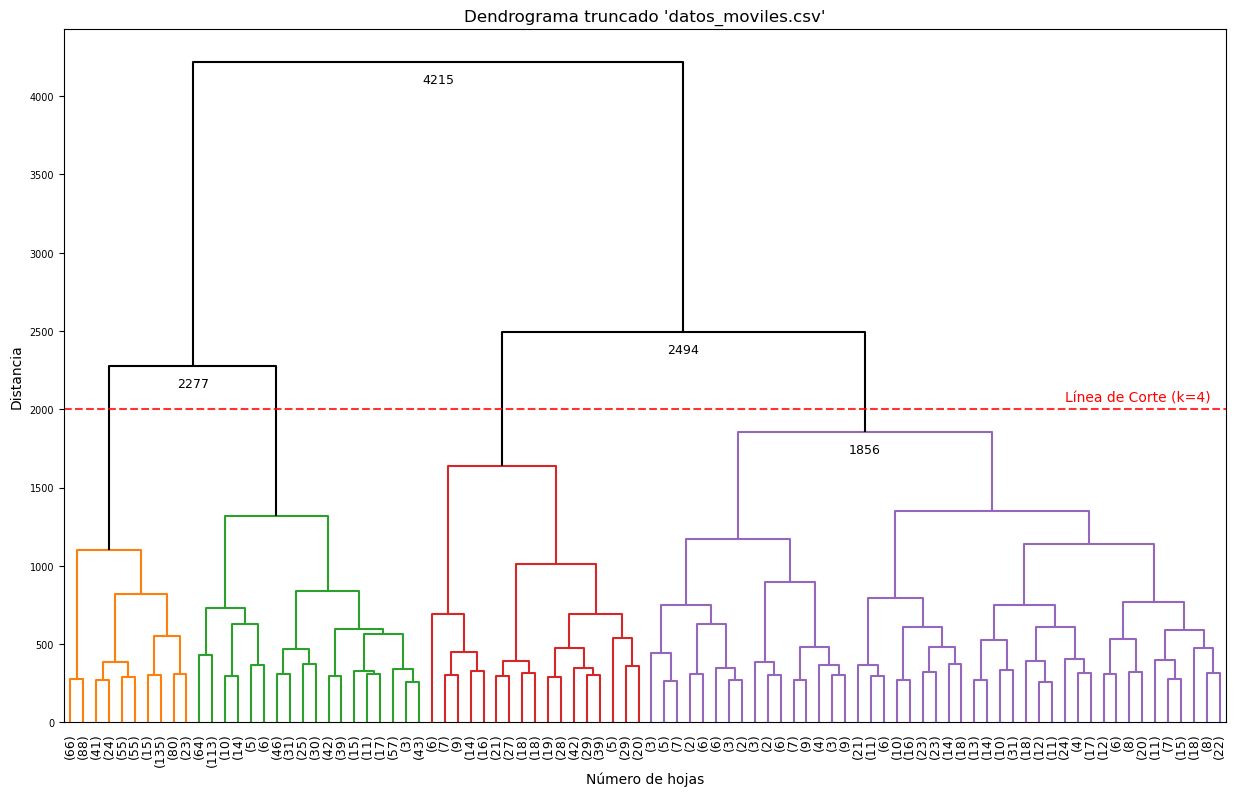

In [239]:
from scipy.cluster.hierarchy import dendrogram
#from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import linkage

# Generamos el conjunto de datos
# creamos lista de valores de entrada 'X' con las variables independientes 'ram' y 'price'
columnas = ['price', 'ram']
X = df[columnas].values


# función que etiqueta cada nodo del dendrograma con la distancia acumulada
def augmented_dendrogram(*args, **kwargs):
    plt.figure(figsize=(15,9))
    ddata = dendrogram(*args, **kwargs)
    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if (y > dist_lc-200):
                plt.plot(x, y)
                #plt.plot(x, y, 'ks')
                plt.annotate("%.0f" % y, (x, y), xytext=(0, -8),
                             textcoords='offset points',
                             va='top', ha='center',fontsize=9)

        plt.title("Dendrograma truncado 'datos_moviles.csv'")
        plt.xlabel("Número de hojas")
        plt.ylabel("Distancia")
        plt.xticks(fontsize=9)
        plt.yticks(fontsize=7)
    return ddata


# generamos la matriz de enlaces (linkage matrix)
#array_enlaces=ward(X)
array_enlaces=linkage(X, method='complete')

dist_lc = 2000                           # distancia de la linea de corte que escogemos

# generamos el dendrograma 'mejorado'
augmented_dendrogram(array_enlaces,
               color_threshold=dist_lc,  # aplicamos distintos colores a agrupaciones con dist < dist_lc
               above_threshold_color='k',     # aplicamos color negro a agrupaciones con dist > dist_lc
               p=90, truncate_mode='lastp',  # trunca el dendrograma a partir del nodo 20
               no_labels=False,
               show_leaf_counts=True)         # muestra número de hojas
               
# mostramos línea de corte que escogemos
plt.text(775,dist_lc+50,'Línea de Corte (k=4)',rotation=0, color='r',fontsize=10, alpha=1)
plt.axhline(linestyle='--', y=dist_lc, color='r', alpha=0.8)
plt.show()



En base al dendrograma, las distancias entre clústeres por debajo del nivel k = 4 empiezan a ser significativas, por lo que parece razonable seleccionar 4 clústeres.

Por otro lado, en relación al criterio de similitud entre clústeres, optaremos por un planteamiento distinto al default ('ward') ya que este es adecuado para agrupamientos de tamñanos similares, cosa que no ocurre con nuestro dataset. En nuestro caso optaremos por el criterio 'complete', recomendable para datasets en los que, presumiblemente, obtendremos agrupamientos con números muy diferentes de elementos.


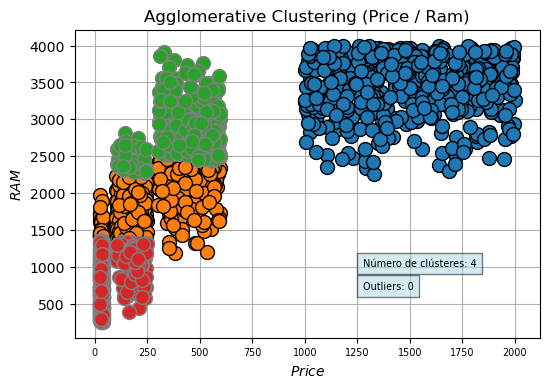

In [245]:
from sklearn.cluster import AgglomerativeClustering

#Aplicamos agrupamiento por aglomeración
agg_clf=AgglomerativeClustering(n_clusters=4, linkage="complete")
agg_clf.fit(X)

plt.figure(figsize=(6,4))
discrete_scatter(X[:,0],X[:,1],agg_clf.labels_, markers='o')

plt.xlabel('$Price$')
plt.ylabel('$RAM$')
plt.xticks(np.arange(0, 2250, 250), fontsize=7)

#Adding text inside a rectangular box by using the keyword 'bbox'
plt.text(1275, 1000, 'Número de clústeres: '+str(agg_clf.labels_.max()+1), fontsize = 7, bbox = dict(facecolor = 'lightblue', alpha = 0.5))
plt.text(1275, 700, 'Outliers: '+ str(list(agg_clf.labels_).count(-1)), fontsize = 7, bbox = dict(facecolor = 'lightblue', alpha = 0.5))

plt.title('Agglomerative Clustering ({} / {})'.format('price'.capitalize(), 'ram'.capitalize()))
plt.grid()
plt.show()


Podemos apreciar que el algoritmo de Aglomeración de Agrupamientos tampoco es capaz de detectar los clústeres que a simple vista podemos observar, demostrando la dificultad que tiene este algoritmo para la detección de clústeres de formas complejas.


**15. Considera ahora el dataset completo. Aplica el algoritmo PCA y obtén y representa la varianza explicada en función del número de dimensiones. ¿Cuántas dimensiones requerirás para salvaguardar una varianza en torno al 95%?**

Confirmemos primeramente si resulta conveniente escalar los datos iniciales. Para ello, calcularemos la varianza de cada una de las características:

In [247]:
# Cargamos una copia del dataset completo
X = df.copy()

var_list = dict(X.var().round(2))         # convertimos la serie a dictionary
var_list_ordenada = sorted(var_list.items(), key=lambda item: item[1], reverse=True)  #ordenamos dict en función de su 'value'

print("Varianza de cada característica/dimensión:\n__________________________________________")
for i in range(len(var_list_ordenada)):
    print( "{:<14}:{:>14,.2f}".format( var_list_ordenada[i][0],var_list_ordenada[i][1] ))


Varianza de cada característica/dimensión:
__________________________________________
ram           :  1,176,643.61
price         :    354,889.48
px_height     :    196,941.41
battery_power :    193,088.36
px_width      :    186,796.36
mobile_wt     :      1,253.14
int_memory    :        329.27
clock_speed   :         66.59
pc            :         36.78
talk_time     :         29.85
sc_w          :         18.98
fc            :         18.85
sc_h          :         17.75
m_dep         :          8.32
n_cores       :          5.23
price_range   :          1.25
blue          :          0.25
dual_sim      :          0.25
four_g        :          0.25
touch_screen  :          0.25
wifi          :          0.25
three_g       :          0.18


Observamos que la varianza de las características difieren mucho entre ellas, especialmente la de 'ram' que es muy superior a la de los demás. Resulta entonces adecuado aplicar un escalado previo ya que, si no realizáramos, esta dimensión resultaría sin duda la predominante, dado que el algoritmo PCA lo que trata es de preservar el máximo de varianza.
A continuación, aplicaremos el algoritmo PCA y representaremos gráficamente la varianza explicada.


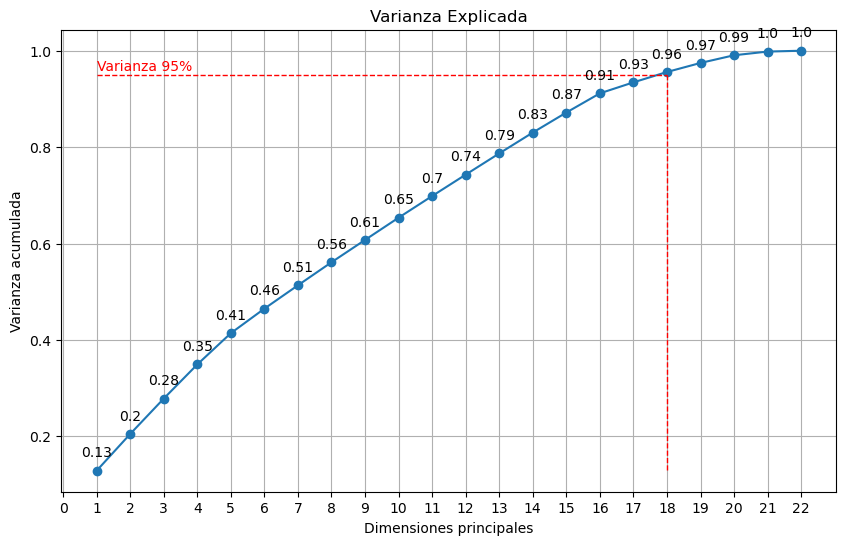

In [252]:
from sklearn.decomposition import PCA

# aplicaremos el escalado, para lo que necesitaremos el procedimiento de pipeline
from sklearn.pipeline import make_pipeline

# Paso 2: Aplicar el escalado y el algoritmo PCA de manera sucesiva
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)

# Guardamos los datos del método PCA aplicado en el objeto modelo_pca
modelo_pca = pca_pipe.named_steps['pca']

# Paso 3: Veamos cuáles son los 'componentes principales':
dim=[i for i in range(len(X.columns))]

'''
# imprimimos cabecera de listado con 5 primeras letras de cada característica
columnas = list(X.columns)
print("Label:", end="  ")
for i in range(len(columnas)):
    print(columnas[i][:5], end=" " )
print("")

# imprimimos los autovectores de cada Componente Principal
for i in dim:
    print("CP",i,":",*modelo_pca.components_.T[:,i].round(2))

# Paso 4: veamos el porcentaje de varianza acumulada que nos van proporcionando las componentes principales a medida
# que las vamos considerando.
print("\nPorcentaje de Varianza acumulada por Comp.Ppal.(0 - {}):\n".format(len(dim)-1),*modelo_pca.explained_variance_ratio_.round(2))
'''

# Paso 5: representación gráfica que nos clarificará dichos porcentajes de salvaguarda de la varianza:

cumsum = np.cumsum(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(np.arange(len(X.columns)) + 1,cumsum, marker = 'o')
plt.xlabel("Dimensiones principales")
plt.ylabel("Varianza acumulada")
plt.title("Varianza Explicada")
ax.hlines(y=0.95, xmin=1, xmax=18, linewidth=1, linestyles='--', color='r')
ax.vlines(x=18, ymin=0.13, ymax=0.95, linewidth=1, linestyles='--', color='r')
plt.text(1,0.96,'Varianza 95%',rotation=0, color='r')
plt.xticks(np.arange(min(dim), max(dim)+2, 1.0))
plt.grid()
for x, y in zip(np.arange(len(X.columns)) + 1, cumsum):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')


Como podemos observar, con 18 características o dimensiones alcanzaríamos el requisito de 95 % de varianza explicada, pudiendo así reducir el total de características a emplear en 4 (de 22 a 18).




Mis preguntas:

1) Kernel Lineal - he visto que existen 2 funciones distintas para implementar este modelo:
    (a) SVC(kernel="linear",C=1,random_state=1)
    (b) LinearSVC(C=1, random_state=1)
   La función (b) es mucho más rápida pero resulta en una exactitud menor (76% vs 82,2%) ¿Por qué? 
   ¿Qué diferencia hay entre ambas funciones y cuál de ellas es más apropiado emplear?
   
2) Estrategia OvR - he buscado en internet como implementarla pero dudo de haberlo hecho correctamente ¿dónde puedo encontrar los detalles de Foro de trabajo 2)?

3) Aplicando una estrategia OvR sobre SVC(), la exactitud que logramos en la clasificación es del 82,8% (la función SVC(), por defecto, utiliza el algoritmo 'RBF'con gamma=1/n_features=0.5 y C=1). Sin embargo, si repetimos el ejercicio con el algortimo 'RBF' con los parámetros por defecto (gamma=0.5, C=1) obtenemos una exactitud menor. ¿Por qué?

4) HDBSCAN - he buscado en internet como implementarla pero dudo de haberlo hecho correctamente ¿dónde puedo encontrar los detalles de Foro de trabajo 3?

5) Dendograma: La dimensión vertical de un dendograma indica la distancia (euclídea, coseno, etc) entre clústeres pero entiendo que es la acumulada entre un agrupamiento concreto (nodo) y su hoja(extremo), correcto?

6) Dendograma: Mirando el dendograma,  no me queda claro el criterio a seguir para escoger 'k'. ¿Algún consejo?

7) ¿Sería posible obtener la versión oficial del resultado de este proyecto? Me ayudaría a aclarar conceptos y corregir errores que hubiera podido cometer.